# Phase estimation

## 0 Background

  Phase estimation is the key for many quantum algorithms such as Shor algorithm and Variation Quantum algorithm. The use of phase estimation is to calculate the eigenvalue phase of any unitary operator, giving us an estimation of the phase. As a typical subroutine in the quantum computation, we could combine phase estimation with other subroutines to perform some interesting computational tasks.

## 1 Phase estimation

  Suppose a unitary operator $U$ has an eigenstate $\left|u\right \rangle$ with eigenvalue $e^{2\pi i \theta}$ , where the value of $\theta$ is unknown. The goal of the phase estimation algorithem is to estimate $\theta$. We use $\theta$ to represent the actual phase and $\theta^{'}$ to represent the phase we estimate.

### 1.1 Quantum Fourier transform(QFT)

 In the phase estimation algorithm, we need to use quantum Fourier transform and its inverse. Let us get back to the formula of QFT:
$$
 QFT\left|j\right\rangle=\frac{(\left|0\right\rangle+e^{2\pi i0.j_{n}}\left|1\right\rangle)(\left|0\right\rangle+e^{2\pi i0.j_{n-1}j_{n}}\left|1\right\rangle)…(\left|0\right\rangle+e^{2\pi i0.j_{1}…j_{n}}\left|1\right\rangle)}{2^{n/2}}
 $$
  It is easy to construct the circuit of the inverse quantum Fourier transform because the quantum Fourier transform is unitary. We only need to apply the adjoint operator in the original quantum Fourier transform circuit in reverse order.

### 1.2 the procedure of phase estimation

 The procedure of phase estimation uses two registers.

  The first register contains t qubits named help-qubits in the state $\left|0\right\rangle$ . How we choose t depends on two things: the number of digits of accuracy we wish to have in our estimate for $\theta$, and with what probability we wish the phase estimation procedure to be successful. The dependence of t on these quantities emerges naturally from the following analysis.

  The second register begins in the state $\left|u\right\rangle$ , which is the eigenvector of the operator $U$ . It contains as many qubits as is necessary to store $\left|u\right\rangle$.

  The procedure of the first stage of phase estimation is as below:
  ![1](./phase_estimation.png#pic_center)
  We begin by apply a Hadamard transform to the first register, followed by application of $controlled-U$ operations on the second register, with U raised to succesive powers of two. The final state can be seen in the above graph. Then we apply the inverse quantum Fourier transform on the first register. The final stage of phase estimation is to read out the state of the first register by doing a measurement in the computational basis.

  The schematic of the overall phase estimation procedure is as below:
  ![2](./phase-estimation-1.png#pic_center)

### 1.3 mathematical derivation

  To sharpen our intuition, we derive the procedure by mathematical tools. The initial condition is $U\left|u\right\rangle=e^{2\pi i\theta}\left|u\right\rangle$ , $\theta$ is the phase  
  **1.initial state**: The initial state of the system is $\left|\underbrace{00\dots0}_t\right\rangle\otimes\left|u\right\rangle$  

  **2.uniform mix**: Apply a Hadamard transform to all of the help-qubits, mixing into a uniform superposition state $\frac{1}{\sqrt{2^t}}(\left|00\dots0\right\rangle+\dots+\left|11\dots1\right\rangle)$ . The system turns into the $\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}\left|j\right\rangle\otimes\left|u\right\rangle)$ state  
  **3.controlled-U gate**: The controlled-U gate does nothing when the help-qubit is in the state $\left|0\right\rangle$ When the help-qubit is in the state $\left|1\right\rangle$, the controlled-U gate does  $2^j$ U operations (j depends on the index of the help-qubit). Under such operations the whole system turns into the state:
  $$
\begin{equation}
\begin{aligned}
the system state&=\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}\left|j\right\rangle\otimes \sum_{j=0}^{2^t-1}U^{2^j}\left|u\right\rangle) \\
&=\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}e^{2\pi i\theta \cdot 2^j}\left|j\right\rangle)\otimes \left|u\right\rangle \\
&=\frac{(\left|0\right\rangle+e^{2\pi i\theta \cdot2^{t-1}}\left|1\right\rangle)(\left|0\right\rangle+e^{2\pi i\theta \cdot2^{t-2}}\left|1\right\rangle)…(\left|0\right\rangle+e^{2\pi i\theta \cdot2^{0}}\left|1\right\rangle)}{2^{t/2}} \otimes \left|u\right\rangle \\
&=\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}e^{2\pi i\cdot \theta_j}\left|j\right\rangle)\otimes \left|u\right\rangle
\end{aligned}
\end{equation}
  $$
  $\theta_j$ is the binary representation of $\theta$ , $\theta=0.\theta_1 \theta_2 \dots \theta_{t}$ , From the third line in the equation (2), it is obvious that the state in the first register is the output of implementing the quantum Fourier transform on $\theta$  
  **4.measurement**: we make a measurement on the first register and get $\theta^{'}$ . If the scale of decimal places  of $\theta$ is less than or equal to t , $\theta^{'}$ is the accurate estimation of $\theta$ . If the scale of decimal digit of $\theta^{'}$ is more than t , $\theta^{'}$ is the approximate estimation of $\theta$ , with an accuracy t.

**additional remarks**: If we want to approximate $\theta$ to an accuracy n with probability of success at least $1-\epsilon $, we shoule choose:
$$
t=n+[\log_{2}{(2+\frac{1}{2\epsilon})}]  \ ([x]\ means\ x\ rounds\ up\ to\ the\ next\ integer)
$$
For detailed proof, please refer to 'Quantum computation and Quantum information' Chapter 5 by A.Nielsen & L.Chuang

### 1.4 prepare eigenvector state

  In order to make use of the phase estimation algorithm, we need to be able to prepare an eigenstate $\left|u\right\rangle$ of U. What if we do not know how to prepare such an eigenstate? Suppose that we prepare some other state $\left|\psi_{n}\right\rangle$ , $n=1,2,3,\dots$, with eigenvalues $e^{2\pi i\theta_{n}}$ . Expanding this state in terms of eigenstates $\left|u\right\rangle$ gives $\left|u\right\rangle={\textstyle \sum_{n}^{}}c_{n}\left|\psi_{n}\right\rangle$ . Intuitively, the result of running the phase estimation algorithm will be to give as output a state close to ${\textstyle \sum_{n}^{}}c_{n}\left|\theta_{n}^{'}\right\rangle \otimes \left|\psi_{n}\right\rangle$ , where $\theta_{n}^{'}$ is a pretty good approximation to the phase $\theta_{n}$ . We obtain a probability distribution, where u is chosen at random with probability $\left| c_{n}^{2}\right|$ . This procedure allows us to avoid preparing a (possibly unknown) eigenstate, at the cost of introducing some additional randomness into the algorithm.

### 1.5 algorithm

 **Inputs**: 1.A black box wich performs a controlled-$U^j$ operation, for integer $j=0,1,2\dots t$)

 2. an eigenstate $\left|u\right\rangle$ of $U$ with eigenvalue $e^{2\pi i\theta_{u}}$

 3. $t=n+[\log_{2}{(2+\frac{1}{2\epsilon})}]$   ([x] means x rounds up to the next integer) qubits initialized to the state $\left|0\right\rangle$

 **Outputs**: An n-bit approximation $\theta_{u}^{'}$ to $\theta_{u}$

 **Runtime**: $O(t^2)$ operations and one call to every controlled-$U^j$ black box.

 **Success rate**: Succeeds with probability at least $1-\epsilon$

 **Procedure**: 1. $\left|0\right\rangle\otimes\left|u\right\rangle$ $\ \ $Initial State

 2. $\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}\left|j\right\rangle\otimes\left|u\right\rangle)$ $\ \ $uniform mixing state

 3. $\frac{1}{\sqrt{2^t}}(\sum_{j=0}^{2^t-1}e^{2\pi i\cdot \theta_j}\left|j\right\rangle)\otimes \left|u\right\rangle$ $\ \ $result of black box

 4. $\left|\theta_{n}^{'}\right\rangle \otimes \left|\psi_{n}\right\rangle$ $\ \ $ apply inverse quantum Fourier transform

 5. $\left|\theta_{n}^{'}\right\rangle$ $\ \ $ measure first register

## 2 do phase estimation by pyquafu

### 2.1 the estimation of T gate

 The first example we use phase estimation to estimate T operator, the matrix representation of T gate is:  $T=\begin{bmatrix}
 1 & 0\\
 0 & e^{\frac{i\pi}{4} }
\end{bmatrix}$ . So $T\left|0\right\rangle=\left|0\right\rangle , T\left|1\right\rangle=e^{2\pi i \theta}\left|1\right\rangle$ , $\theta=\pi /8$ . In the first example we only use three help-qubits.

In [1]:
#import packages we need
from quafu import QuantumCircuit,Task,simulate
import numpy as np
import matplotlib.pyplot as plt

def iqft(qc,n): #inverse quantum Fourier transform, apply the adjoint operator in the original quantum Fourier transform circuit in reverse order.
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1) #swap before rotate
    for i in range(n):
        for k in range(i):
            qc.cp(n-k-1,n-1-i,-np.pi*(2**(k-i))) #in reverse order
        qc.h(n-i-1)
    return qc

def mix(qc,n):
    for qubit in range(n):
        qc.h(qubit)##mix into the uniform superposition state
    return qc

def repeat_ct(qc,n,cbit):
    repetitions=1
    for help_qubit in range(n):
        for i in range(repetitions):
            qc.ct(help_qubit,cbit)  # ct represents the controlled-T gate,the first parameter is the controlled bit,the second parameter is the target bit.
        repetitions *= 2 # power raise
    return qc

qpe = QuantumCircuit(4)
qpe.x(3) #prepare an arbitrary state in the second register
mix(qpe,3)
repeat_ct(qpe,3,3)
qpe.barrier([0,1,2,3])
qpe.swap(0,2)
iqft(qpe,3)
qpe.barrier([0,1,2,3])
qpe.measure([0,1,2])
qpe.draw_circuit(width=2)

q[0]  -H--*--------------------||-x--x-------------------P(-0.785)--P(-1.571)--H--|| M->c[0]
          |                    || |  |                       |          |         ||
q[1]  -H--|--*--*--------------||-|--|-----P(-1.571)--H------|----------*---------|| M->c[1]
          |  |  |              || |  |         |             |                    ||
q[2]  -H--|--|--|--*--*--*--*--||-x--x--H------*-------------*--------------------|| M->c[2]
          |  |  |  |  |  |  |  ||                                                 ||
q[3]  -X--T--T--T--T--T--T--T--||-------------------------------------------------||


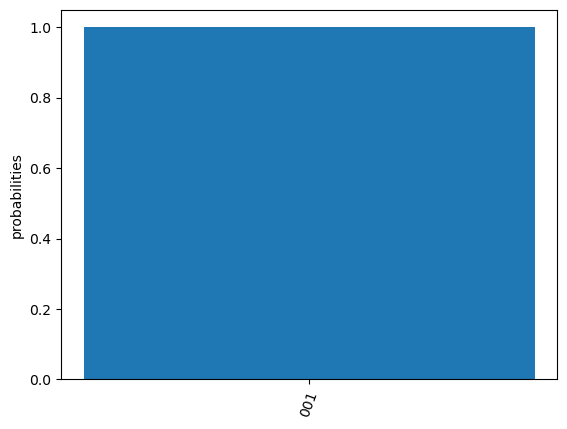

In [2]:
#simulate to verify
simu_res = simulate(qpe,output='probabilities')
simu_res.plot_probabilities()
plt.show()

### 2.2 Insufficient accuracy(3 qubits simulation)

In the chapter 2.1, we estimate T gate. Actually the phase of T gate only needs three help-qubits to estimate. Suppose we replace the phase with $\theta=1/3$ , three help-qubits are not enough. We prove this statement in the below.

q[0]  H-----*----------------------------------------------------------||x-x---------------P(-0.785)-P(-1.571)-H-|| M->c[0]
            |                                                          ||| |                   |         |       ||
q[1]  H-----|--------*--------*----------------------------------------|||-|---P(-1.571)-H-----|---------*-------|| M->c[1]
            |        |        |                                        ||| |       |           |                 ||
q[2]  H-----|--------|--------|--------*--------*--------*--------*----||x-x-H-----*-----------*-----------------|| M->c[2]
            |        |        |        |        |        |        |    ||                                        ||
q[3]  X--P(2.094)-P(2.094)-P(2.094)-P(2.094)-P(2.094)-P(2.094)-P(2.094)||----------------------------------------||


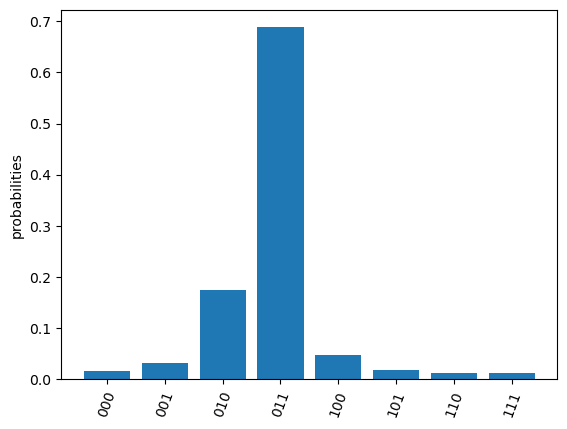

In [3]:
qpe2=QuantumCircuit(4)
qpe2.x(3)
mix(qpe2,3)
angle=2*np.pi/3
repetitions2=1
for help_qubit in range(3):
    for i in range(repetitions2):
        qpe2.cp(help_qubit,3,angle)
    repetitions2 *= 2
qpe2.barrier([0,1,2,3])
qpe2.swap(0,2)
iqft(qpe2,3)
qpe2.barrier([0,1,2,3])
qpe2.measure([0,1,2])
qpe2.draw_circuit(width=1)
simu_res2 = simulate(qpe2,output='probabilities')
simu_res2.plot_probabilities()
plt.show()

We could see from the outputs that 010(bin)=2(dec) and 011(bin)=3(dec) have the highest probabilities, giving $\theta=2/2^{3}=0.25$ and $\theta=3/2^{3}=0.375$ . The actual phase $\theta=1/3=0.333\dots$ is between two estimations, So the accuracy is not enough. we need more help-qubits to do phase estimation.

### 2.3 More accurate estimation(5 qubits simulation)

We increase the number of help-qubits to 5 and simulate phase estimation

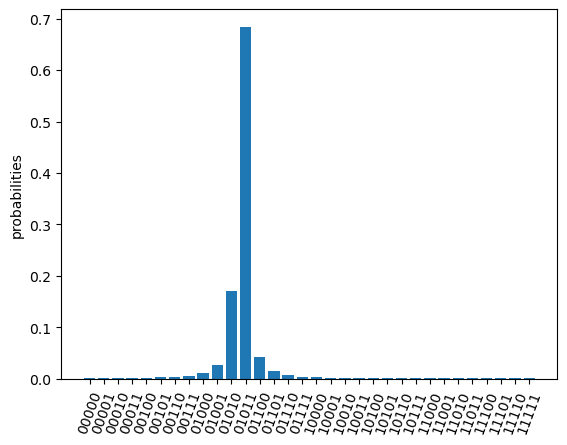

In [4]:
qpe3=QuantumCircuit(6)
qpe3.x(5)
mix(qpe3,5)
angle=2*np.pi/3
repetitions3=1
for help_qubit in range(5):
    for i in range(repetitions3):
        qpe3.cp(help_qubit,5,angle)
    repetitions3 *= 2
qpe3.barrier([0,1,2,3,4,5])
iqft(qpe3,5)
qpe3.barrier([0,1,2,3,4,5])
qpe3.measure([0,1,2,3,4])
simu_res3 = simulate(qpe3,output='probabilities')
simu_res3.plot_probabilities()
plt.show()

This time the outputs with the highest probabilities are 01011(bin)=11(dec) and 01010(bin)=10(dec), giving  $\theta=11/2^{5}=0.344$ and $\theta=10/2^{5}=0.313$ . The actual phase $\theta=1/3=0.333\dots$  is still between two estimations, the relative error is 3% and 6% , the accuracy has been improved obviously. If we use more help-qubits, we could achieve any accuracy we need.